In [63]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [64]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Let's have a look at the given data types.

In [65]:
weather_2012.dtypes

Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object

# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

In [11]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [66]:
# Not super useful
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

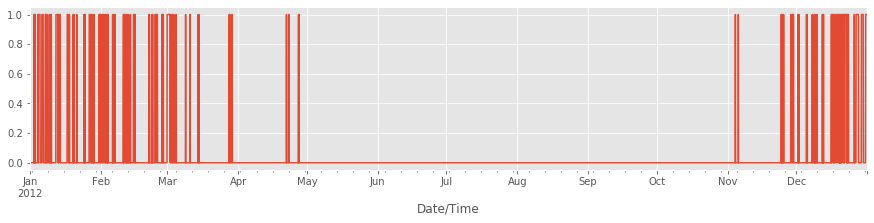

In [67]:
# More useful!
is_snowing_float=is_snowing.astype(float)
is_snowing_float.plot()

**! (Extra)** What is the average air pressure on days when it has rained. Is it lower or higher than on days without rain?

In [ ]:
is_raining =


In [19]:
#Solution (1):
is_raining = weather_description.str.contains('Rain')
weather_2012[is_raining]["Stn Press (kPa)"].mean()

100.30583454281559

In [20]:
#Solution (2):
weather_2012[~is_raining]["Stn Press (kPa)"].mean()

101.11510067943169

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:

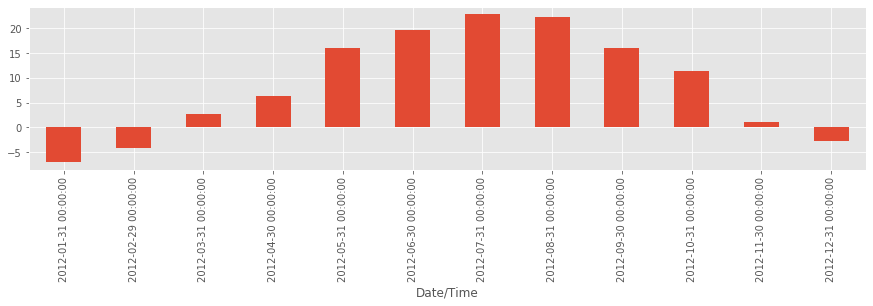

In [26]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [70]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

You can use `resample` to find the percentage of time it was snowing each month (see above). And plot it as a bar chart

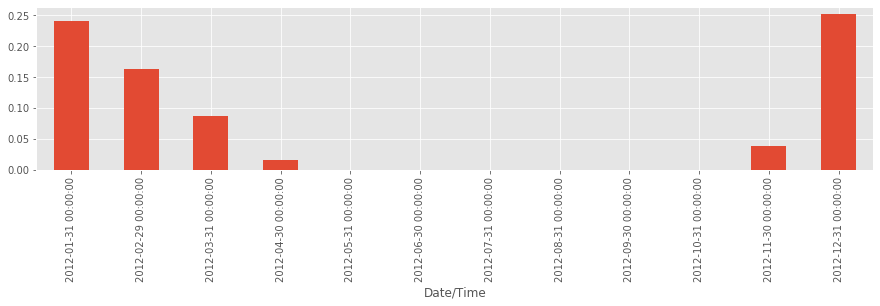

In [72]:
weather_2012['is_snowing'] = is_snowing.astype(float)
weather_2012['is_snowing'].resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [73]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [43]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


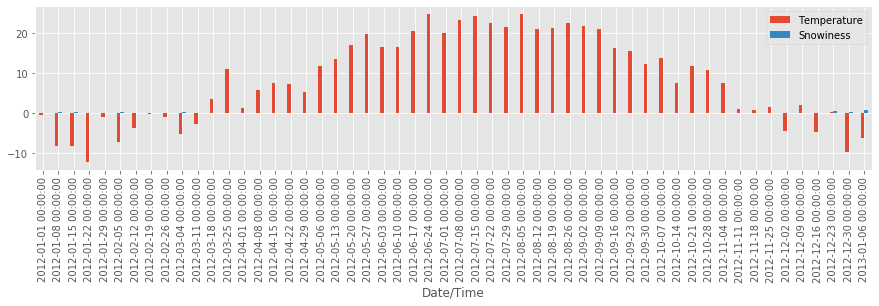

In [74]:
stats.plot(kind='bar')

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1272f0050>,
      dtype=object)

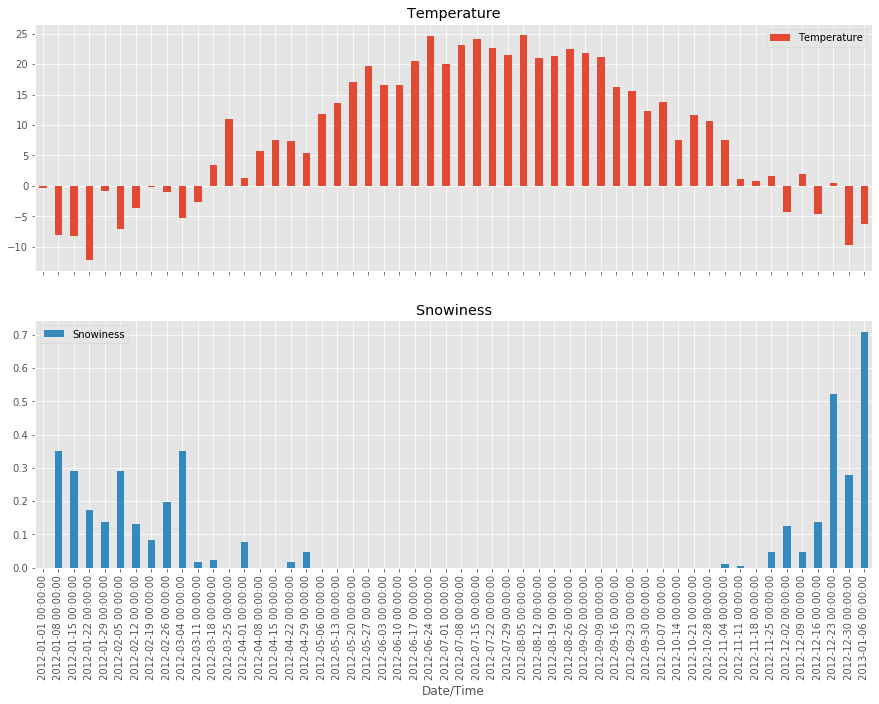

In [75]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

How do temperature and snowiness correlate? You can get the correlation matrix wirh `'corr()'`

In [76]:
stats.corr()

,Temperature,Snowiness
Temperature,1.000000,-0.637248
Snowiness,-0.637248,1.000000


**! (Extra)** Make this correlation visible through a scatter plot. Compute the weekly Snowiness and plot it against the median weekly temperature. 

In [59]:
#Compute the weekly Snowiness (percentage) and weekly temperature (median) as Series
weekly_temperatur = 
weekly_snowiness = 

# Name the columns and concat to Dataframe (done)
weekly_temperatur.name = "Temperature"
weekly_snowiness.name = "Snowiness"
weekly_stats = pd.concat([weekly_temperatur, weekly_snowiness], axis=1)

#Show as scatter plot:


SyntaxError: invalid syntax (<ipython-input-59-f7cbc2248c6d>, line 2)

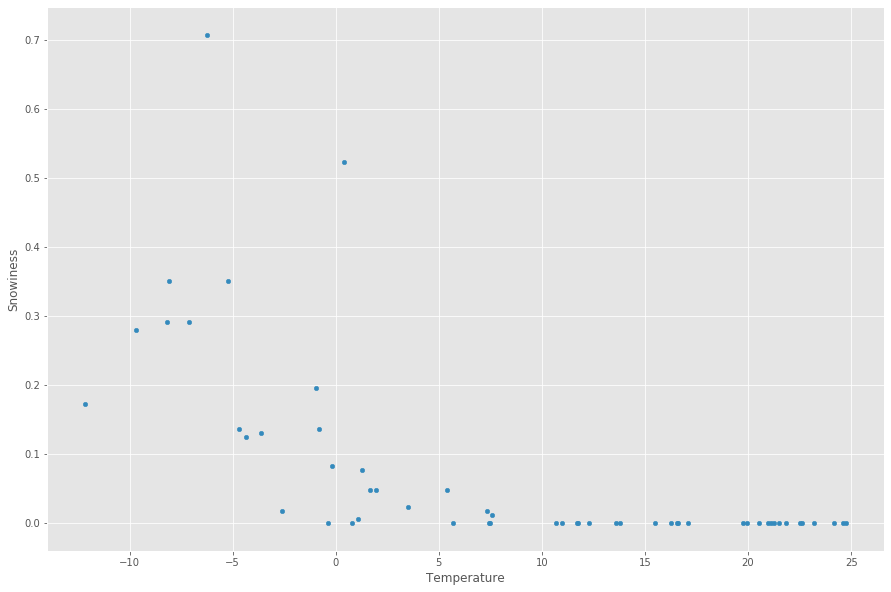

In [77]:
#Solution:

#Compute the weekly Snowiness (percentage) and weekly temperature (median) as Series
weekly_temperatur = weather_2012['Temp (C)'].resample('W').apply(np.median)
weekly_snowiness = is_snowing.astype(float).resample('W').apply(np.mean)

# Name the columns and concat to Dataframe (done)
weekly_temperatur.name = "Temperature"
weekly_snowiness.name = "Snowiness"
weekly_stats = pd.concat([weekly_temperatur, weekly_snowiness], axis=1)

#Show as scatter plot:
weekly_stats.plot(kind='scatter', x='Temperature', y='Snowiness', figsize=(15, 10))